# Obesity Dataset

Obesity is a great challenge for health worldwide, which cause various health disease and reduce life quality. With the help of this data set we aims to estimate the obesity level in individuals based on their physical activities, eating habits, family history on overweight, etc. We will use various methods on the dataset gathered from public online survey to prevent and reduce the obesity level.

In [53]:
! pip install kagglehub


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import kagglehub

In [55]:
# Download latest version
path = kagglehub.dataset_download("lesumitkumarroy/obesity-data-set")

print("Path to dataset files:", path)

Path to dataset files: /Users/maurorusso/.cache/kagglehub/datasets/lesumitkumarroy/obesity-data-set/versions/1


In [56]:
dataset = pd.read_csv(path + "/ObesityDataSet_raw_and_data_sinthetic.csv")

In [57]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Preprocessing

In [58]:
# let's take an overview of the dataset
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [59]:
# let's check for missing or null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [60]:
# the dataset does not have missing values, so we don't need to do imputation
# but there are categorical data; we will need to transform them

In [61]:
columns = dataset.dtypes.copy()
columns

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [62]:
# let's see the label possible values
dataset['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [63]:
# let's create an array with all the names of categorical columns
cat_columns = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']

In [64]:
# let's transform the categorical columns into numerical with a simple OrdinalEncoder
enc = OrdinalEncoder()
cat_columns_df = dataset[cat_columns]
enc.fit(cat_columns_df)
cat_columns_transf = enc.transform(cat_columns_df)

In [65]:
dataset[cat_columns] = cat_columns_transf
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   float64
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   float64
 5   FAVC                            2111 non-null   float64
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   float64
 9   SMOKE                           2111 non-null   float64
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   float64
 12  FAF                             21

In [66]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,1.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,5.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,6.0


<Axes: >

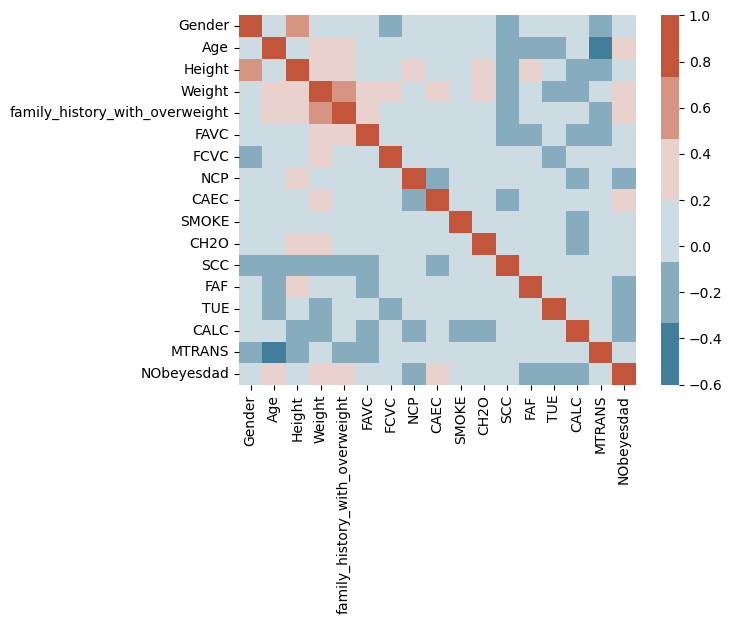

In [67]:
# let's analyze the correlation matrix
cmap = sns.diverging_palette(230,20)
sns.heatmap(dataset.corr(), cmap=cmap)

In [68]:
# from the correlation matrix we notice that:
# Obesity is slightly negatively correlated with: Gender, Age, Weight, family_history, SMOKE
# Gender is correlated with Height
# Weight is correlated with family_history
# ...
# there are also other correlations/negative correlations

# among the most interesting correlations we have those between family_history, FAVC (consumption of high-calorie foods), CAEC (eating between main meals)
# We can summarize these three features into a single feature intended as 'family nutritional habits'
# So we can combine them linearly
# (We could make other combinations but they seem more 'risky')

In [69]:
# let's create the new feature 'habits'
habits = dataset['family_history_with_overweight'] + dataset['FAVC'] + dataset['CAEC']
habits

0       3.0
1       3.0
2       3.0
3       2.0
4       2.0
       ... 
2106    4.0
2107    4.0
2108    4.0
2109    4.0
2110    4.0
Length: 2111, dtype: float64

In [70]:
dataset.insert(len(dataset.columns), 'Habits', habits)
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Habits
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1.0,3.0
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1.0,3.0
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1.0,3.0
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,5.0,2.0
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,4.0,4.0
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,4.0,4.0
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,4.0,4.0
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,4.0,4.0


In [71]:
dataset.drop(['family_history_with_overweight', 'FAVC', 'CAEC'], axis=1, inplace=True)
dataset

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Habits
0,0.0,21.000000,1.620000,64.000000,2.0,3.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1.0,3.0
1,0.0,21.000000,1.520000,56.000000,3.0,3.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1.0,3.0
2,1.0,23.000000,1.800000,77.000000,2.0,3.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1.0,3.0
3,1.0,27.000000,1.800000,87.000000,3.0,3.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,5.0,2.0
4,1.0,22.000000,1.780000,89.800000,2.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,3.0,3.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,4.0,4.0
2107,0.0,21.982942,1.748584,133.742943,3.0,3.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,4.0,4.0
2108,0.0,22.524036,1.752206,133.689352,3.0,3.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,4.0,4.0
2109,0.0,24.361936,1.739450,133.346641,3.0,3.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,4.0,4.0


In [72]:
X = dataset.copy()
y = X.pop('NObeyesdad')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Random Forest Classifier

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) of the individual trees. It is known for its robustness and ability to handle large datasets with higher dimensionality.

In this notebook, we will use the Random Forest Classifier to predict obesity levels based on various features in our dataset. To optimize the performance of our model, we will use GridSearchCV, a method that performs an exhaustive search over a specified parameter grid. This will help us find the best combination of hyperparameters for our Random Forest model, ensuring that we achieve the highest possible accuracy.

In [74]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,20],
    'n_estimators': [100, 200],
    'random_state': [42]
}

In [75]:
grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    refit='accuracy',
    return_train_score=True
)

grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20], 'n_estimators': [100, 200],
                         'random_state': [42]},
             refit='accuracy', return_train_score=True, scoring='accuracy')

In [76]:
clf = grid.best_estimator_

# parametri migliori
for k,v in grid.best_params_.items():
  print(f'{k}: {v}')

criterion: entropy
max_depth: 20
n_estimators: 200
random_state: 42


In [77]:
print(f'Training Accuracy: {grid.best_score_:.4f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.4f}')

Training Accuracy: 0.9473
Test Accuracy: 0.9528


### Tensorflow Neural Network

In this section, we will tackle the problem of predicting obesity levels using two different neural network architectures:

1. **Convolutional Neural Network (CNN)**: CNNs are typically used for image data, but they can also be effective for tabular data by treating each feature as a separate channel.

2. **Fully Connected Neural Network (FCNN)**: FCNNs, also known as Dense Neural Networks, are a more traditional approach for tabular data. We will build a fully connected network to learn the relationships between features and the target variable.

By comparing the performance of these two architectures, we aim to identify the most effective neural network model for this classification task.

The exact architecture of both is decided through extensive testing, which I may omit for clarity and shortness of the notebook

#### callbacks

In [78]:
import tensorflow
from tensorflow import keras
from keras import layers, callbacks, models, optimizers, losses

In [79]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    min_delta=0.01
)

In [80]:
model_checkpoint = callbacks.ModelCheckpoint(
    filepath='best_cnn.keras',
    monitor='val_loss',
    save_best_only=True
)

#### convolutional neural networks

In [81]:
input_shape = X_train.iloc[0].shape
input_shape

(14,)

In [82]:
labels = list(np.unique(y))
num_labels = len(labels)
num_labels

7

In [83]:
model = models.Sequential()
model.add(layers.Conv1D(8, kernel_size=2, activation='relu', input_shape=(14,1)))
model.add(layers.Conv1D(16, kernel_size=2, activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(num_labels, activation='softmax'))

/Users/maurorusso/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9)

In [85]:
model.compile(
    optimizer=optimizers.SGD(
      learning_rate=lr_schedule,
      momentum=0.0,
      nesterov=True,
    ),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [86]:
history = model.fit(
    X_train,
    y_train,
    epochs=300,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
  )

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1695 - loss: 2.4858 - val_accuracy: 0.2311 - val_loss: 1.7238
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.1882 - loss: 1.8041 - val_accuracy: 0.1745 - val_loss: 2.0046
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.2392 - loss: 1.7175 - val_accuracy: 0.1887 - val_loss: 2.0025
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2507 - loss: 1.7161 - val_accuracy: 0.3208 - val_loss: 1.6051
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2943 - loss: 1.6400 - val_accuracy: 0.3538 - val_loss: 1.5256
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.3038 - loss: 1.6174 - val_accuracy: 0.3208 - val_loss: 1.7088
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.2973 - loss: 1.5899 - val_accuracy: 0.3113 - val_loss: 1.7333
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.3199 - loss: 1.6225 - val_accuracy: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.7998 - loss: 0.4174


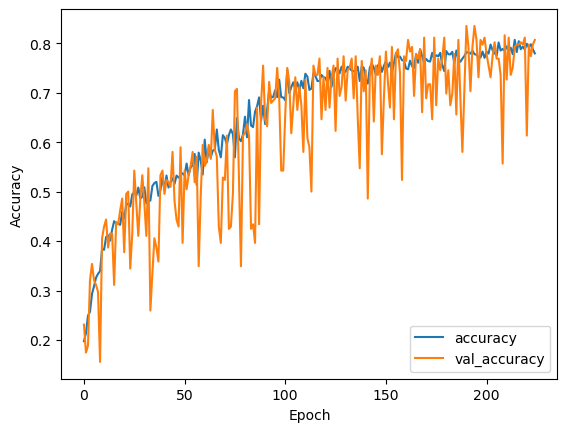

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test)

#### neural networks with dense layers and optimizer adam

In [88]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[14]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(num_labels, activation='softmax'))

/Users/maurorusso/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [90]:
history = model.fit(
    X_train,
    y_train,
    epochs=300,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
  )

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1415 - loss: 4.0933 - val_accuracy: 0.1745 - val_loss: 1.8701
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.2432 - loss: 1.8441 - val_accuracy: 0.1934 - val_loss: 1.7977
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.2109 - loss: 1.7837 - val_accuracy: 0.1698 - val_loss: 1.7498
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.2515 - loss: 1.6869 - val_accuracy: 0.1934 - val_loss: 1.6598
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.2837 - loss: 1.6229 - val_accuracy: 0.2689 - val_loss: 1.6015
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.3110 - loss: 1.5718 - val_accuracy: 0.2925 - val_loss: 1.6060
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.3270 - loss: 1.5474 - val_accuracy: 0.3726 - val_loss: 1.5300
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3424 - loss: 1.4997 - val_accura

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7285 - loss: 0.6327


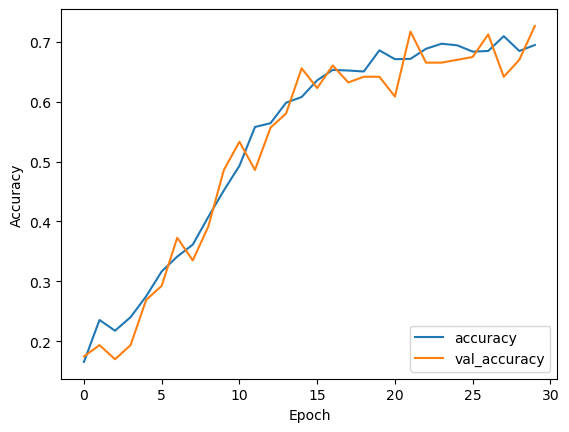

In [91]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test)